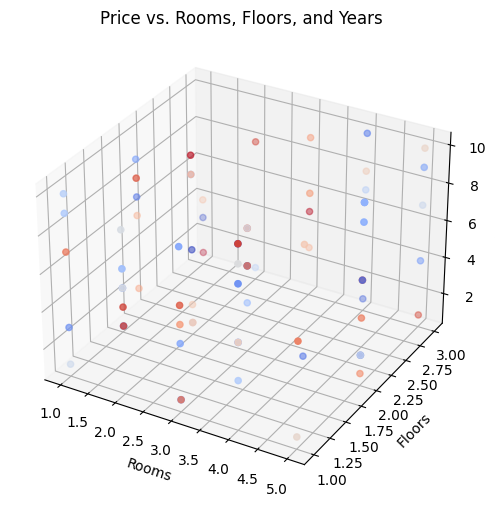

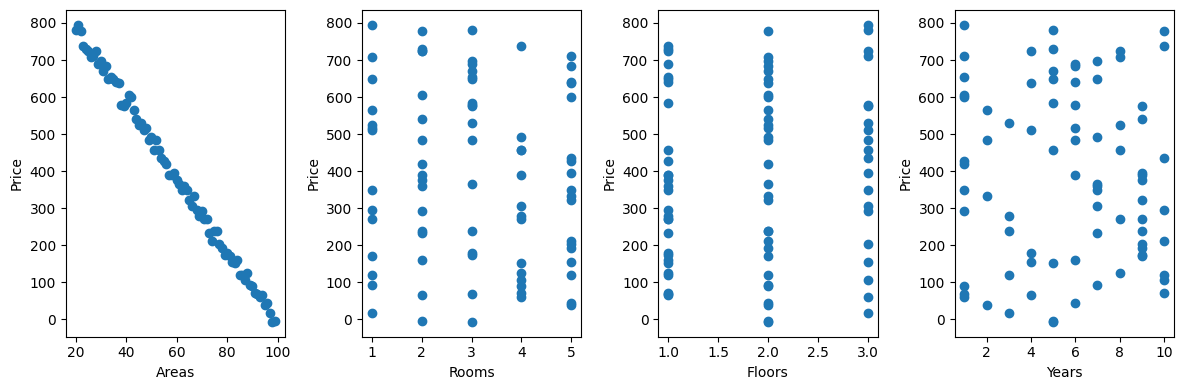

x_train shape (80, 4)
x_val shape (20, 4)
y_train shape (80,)
y_val shape (20,)


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time


num_data_points = 100

swing = 0.2 * num_data_points


def generateData(num_data_points):
    areas = [i for i in reversed(range(num_data_points))]
    rooms = [random.randint(1, 5) for i in range(num_data_points)]
    floors = [random.randint(1, 3) for i in range(num_data_points)]
    years = [random.randint(1, 10) for i in range(num_data_points)]

    x_data = np.array([])
    y_data = []

    prices = []
    for i in range(num_data_points):
        area = areas[i]
        room = rooms[i]
        floor = floors[i]
        year = years[i]
        sample = np.array([[area, room, floor, year]])

        if x_data.size == 0:
            x_data = sample
        else:
            x_data = np.append(x_data, sample, axis=0)

        # price1 = area * (swing / 2) + random.randint(-1 * swing, swing)
        price1 = 10 * i + random.randint(-1 * swing, swing)
        price2 = room / 4 * random.randint(1, 4)
        price3 = floor * random.randint(1, 4)
        price4 = year * -1 * random.randint(1, 3)
        price = price1 + price2 + price3 + price4

        y_data.append(price)

    y_data = np.array(y_data)

    cut = len(areas) - 20
    x_train = np.array(x_data[:cut])
    x_val = np.array(x_data[cut:])

    y_train = np.array(y_data[:cut])
    y_val = np.array(y_data[cut:])

    # Plotting begins

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x_train[:, 1], x_train[:, 2], x_train[:, 3], c=y_train, cmap='coolwarm')
    ax.set_xlabel('Rooms')
    ax.set_ylabel('Floors')
    ax.set_zlabel('Years')
    ax.set_title('Price vs. Rooms, Floors, and Years')

    fig, axs = plt.subplots(1, 4, figsize=(12, 4))

    # Scatter plot for areas
    axs[0].scatter(x_train[:, 0], y_train)
    axs[0].set_xlabel('Areas')
    axs[0].set_ylabel('Price')

    # Scatter plot for rooms
    axs[1].scatter(x_train[:, 1], y_train)
    axs[1].set_xlabel('Rooms')
    axs[1].set_ylabel('Price')

    # Scatter plot for floors
    axs[2].scatter(x_train[:, 2], y_train)
    axs[2].set_xlabel('Floors')
    axs[2].set_ylabel('Price')

    # Scatter plot for years
    axs[3].scatter(x_train[:, 3], y_train)
    axs[3].set_xlabel('Years')
    axs[3].set_ylabel('Price')

    plt.tight_layout()
    plt.show()
    return x_train, x_val, y_train, y_val

x_train, x_val, y_train, y_val = generateData(num_data_points)

print('x_train shape', x_train.shape)
print('x_val shape', x_val.shape)
print('y_train shape', y_train.shape)
print('y_val shape', y_val.shape)

In [ ]:
class LinearRegressionMultiple:

    def __init__(self, learning_rate=0.00012, num_iterations=100000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weight = None
        self.bias = None
        self.costs = []

    def train(self, x_train, y_train, breaking_mechanism=True):
        self.weight = np.zeros((x_train.shape[1]))
        self.bias = 0
        m = len(x_train)
        counter = 0
        prev_cost = -1

        for iter in range(self.num_iterations):
            predicted_prices = np.dot(x_train, self.weight) + self.bias
            errors = predicted_prices - y_train

            dw = 2 * np.dot(x_train.T, errors) / m
            db = 2 * np.sum(errors) / m
            cost = np.mean(errors ** 2)

            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            self.costs.append(cost)

            if breaking_mechanism:
                if abs(prev_cost - cost) < cost * 0.00001:
                    counter += 1
                if counter == 1000:
                    print('Terminated early after', iter - 1, 'iterations')
                    return
                prev_cost = cost

            if iter % 10000 == 0:
                print('iteration', iter, '/', self.num_iterations, end='')
                print(' cost = ', cost)

    def predict(self, x):
        return np.dot(self.weight, x) + self.bias

    def plotFitLine(self, x_train):
        x = x_train[:, 0]
        y = x * self.weight[0] + self.bias
        plt.plot(x, y)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Line Plot')
        plt.show()

    def printValStats(self, x_val, y_val, indi=False):
        error = 0
        accurate = 0
        for i in range(len(x_val)):
            prediction = np.round(self.predict(x_val[i]), 2)
            target = y_val[i]
            ind_error = abs(target - prediction)
            if ind_error <= swing:
                accurate += 1
            error += abs(ind_error)
            if indi:
                print('target:', target, '\t', 'prediction:', prediction,
                    '\t', 'error:', round(ind_error, 2))
        print('total error:', round(error, 2))
        accuracy = round(accurate / len(x_val), 2)
        print('accuracy within margin:', accuracy * 100, '%')

    def printCostGraph(self):
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost vs Iteration')
        plt.show()

iteration 0 / 200000 cost =  205070.8
iteration 10000 / 200000 cost =  29828.80654487139
iteration 20000 / 200000 cost =  19229.91966377049
iteration 30000 / 200000 cost =  12423.579963597002
iteration 40000 / 200000 cost =  8047.128367277017
iteration 50000 / 200000 cost =  5233.080705039812
iteration 60000 / 200000 cost =  3423.654942495962
iteration 70000 / 200000 cost =  2260.198603747427
iteration 80000 / 200000 cost =  1512.0990242040375
iteration 90000 / 200000 cost =  1031.0728247035254
iteration 100000 / 200000 cost =  721.7741552039541
iteration 110000 / 200000 cost =  522.8958673818777
iteration 120000 / 200000 cost =  395.017614846805
iteration 130000 / 200000 cost =  312.7922113072511
iteration 140000 / 200000 cost =  259.92147798698954
iteration 150000 / 200000 cost =  225.9257258046846
iteration 160000 / 200000 cost =  204.06654031845127
iteration 170000 / 200000 cost =  190.01113752696224
iteration 180000 / 200000 cost =  180.97354791707411
iteration 190000 / 200000 cos

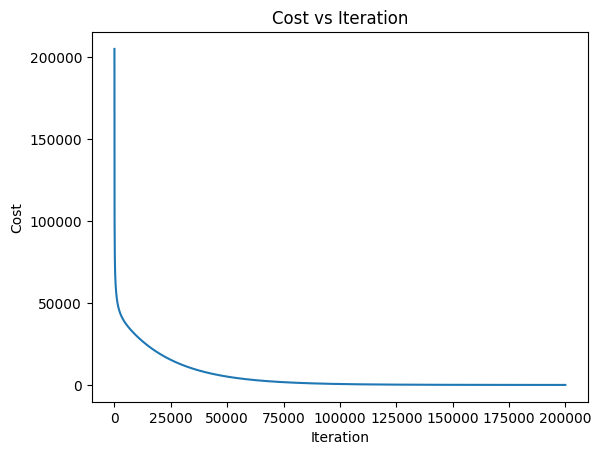


weights: [-9.97825466  0.76091596  2.25895076 -1.51047144] bias: 983.8435792119093



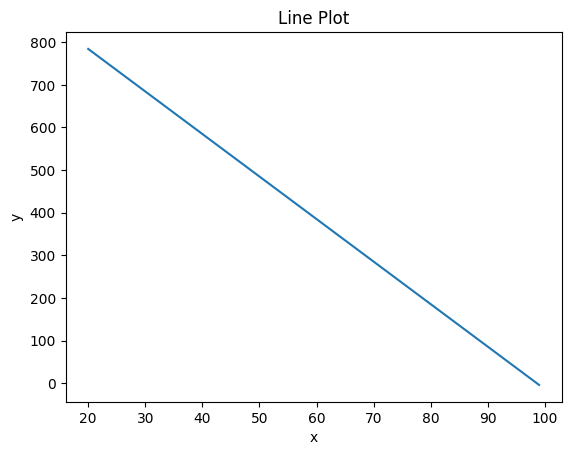


target: 810.5 	 prediction: 794.25 	 error: 16.25
target: 806.0 	 prediction: 800.47 	 error: 5.53
target: 786.5 	 prediction: 805.15 	 error: 18.65
target: 820.5 	 prediction: 819.68 	 error: 0.82
target: 833.0 	 prediction: 826.62 	 error: 6.38
target: 853.75 	 prediction: 842.65 	 error: 11.1
target: 873.75 	 prediction: 849.6 	 error: 24.15
target: 854.5 	 prediction: 855.05 	 error: 0.55
target: 868.0 	 prediction: 871.82 	 error: 3.82
target: 885.5 	 prediction: 890.1 	 error: 4.6
target: 909.0 	 prediction: 901.59 	 error: 7.41
target: 926.0 	 prediction: 907.04 	 error: 18.96
target: 918.0 	 prediction: 911.72 	 error: 6.28
target: 905.0 	 prediction: 923.23 	 error: 18.23
target: 954.25 	 prediction: 927.17 	 error: 27.08
target: 957.25 	 prediction: 942.42 	 error: 14.83
target: 955.0 	 prediction: 947.1 	 error: 7.9
target: 975.25 	 prediction: 967.68 	 error: 7.57
target: 981.0 	 prediction: 977.65 	 error: 3.35
target: 992.5 	 prediction: 989.87 	 error: 2.63
total error:

In [ ]:
regression = LinearRegressionMultiple(learning_rate=0.00023, num_iterations=200000)

regression.train(x_train, y_train, False)
print()
regression.printCostGraph()
print()
print('weights:', regression.weight, 'bias:', regression.bias)
print()
regression.plotFitLine(x_train)
print()
regression.printValStats(x_val, y_val, indi=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create an instance of LinearRegression
regression = LinearRegression()

# Fit the model to the training data
regression.fit(x_train, y_train)

# Predict on the validation data
y_pred = regression.predict(x_val)

# Compute the mean squared error
mse = mean_squared_error(y_val, y_pred)
# print('Mean Squared Error:', mse)

errors = y_val - y_pred

for i in range(len(x_val)):
    print('target:', round(y_val[i], 2), '\t', 'prediction:',
          round(y_pred[i], 2), '\t', 'error:', abs(round(y_val[i] - y_pred[i], 2)))

accuracy = 100 * (1 - np.sum(np.abs(errors) >= swing) / len(y_val))
print('accuracy within margin:', round(accuracy, 2), '%')

target: 810.5 	 prediction: 798.32 	 error: 12.18
target: 806.0 	 prediction: 804.86 	 error: 1.14
target: 786.5 	 prediction: 807.23 	 error: 20.73
target: 820.5 	 prediction: 823.33 	 error: 2.83
target: 833.0 	 prediction: 832.37 	 error: 0.63
target: 853.75 	 prediction: 848.5 	 error: 5.25
target: 873.75 	 prediction: 848.43 	 error: 25.32
target: 854.5 	 prediction: 859.27 	 error: 4.77
target: 868.0 	 prediction: 871.99 	 error: 3.99
target: 885.5 	 prediction: 892.95 	 error: 7.45
target: 909.0 	 prediction: 904.85 	 error: 4.15
target: 926.0 	 prediction: 912.5 	 error: 13.5
target: 918.0 	 prediction: 913.51 	 error: 4.49
target: 905.0 	 prediction: 929.09 	 error: 24.09
target: 954.25 	 prediction: 928.49 	 error: 25.76
target: 957.25 	 prediction: 950.28 	 error: 6.97
target: 955.0 	 prediction: 948.09 	 error: 6.91
target: 975.25 	 prediction: 971.65 	 error: 3.6
target: 981.0 	 prediction: 983.05 	 error: 2.05
target: 992.5 	 prediction: 994.73 	 error: 2.23
accuracy with